In [12]:
# import of libraries we will use
%matplotlib inline
import random
import os
import math
from scipy import stats
from scipy.spatial.distance import pdist
from math import sqrt, log, floor
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd

#Librerías LSTM
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.utils.vis_utils import plot_model

# "Fijar" randomnes para reproducibilidad
random.seed(42)

Leemos los datos 

In [13]:
path = "./data/Notificaciones/"
filename_read = os.path.join(path,"normalizado.csv")
dataset1 = pd.read_csv(filename_read,delimiter=",",engine='python')
dataset1

,Unnamed: 0,anio,casos,distrito_nombre,distrito_notif,incidencia,semana,0
0,0,2009.0,0.0,LOMA PLATA,0,0.0,1.0,NaN
1,1,2009.0,0.0,LOMA PLATA,0,0.0,2.0,NaN
2,2,2009.0,0.0,LOMA PLATA,0,0.0,3.0,NaN
3,3,2009.0,0.0,LOMA PLATA,0,0.0,4.0,NaN
4,4,2009.0,0.0,LOMA PLATA,0,0.0,5.0,NaN
...,...,...,...,...,...,...,...,...
57500,48,2013.0,0.0,JUAN EULOGIO ESTIGARRIBIA,0,0.0,49.0,NaN
57501,49,2013.0,0.0,JUAN EULOGIO ESTIGARRIBIA,0,0.0,50.0,NaN
57502,50,2013.0,0.0,JUAN EULOGIO ESTIGARRIBIA,0,0.0,51.0,NaN
57503,51,2013.0,0.0,JUAN EULOGIO ESTIGARRIBIA,0,0.0,52.0,NaN


In [14]:
noti=dataset1['distrito_nombre'].value_counts() 
noti.sort_values

<bound method Series.sort_values of BENJAMIN ACEVAL            265
YBYRAROVANA                265
CORPUS CHRISTI             265
YPANE                      265
SAN JOSE DE LOS ARROYOS    265
                          ... 
QUIINDY                    265
LAURELES                   265
LAMBARE                    265
ASUNCION                   265
JUAN LEON MALLORQUIN       265
Name: distrito_nombre, Length: 217, dtype: int64>

In [15]:
print("Nulos ",dataset1['incidencia'].isna().sum())

Nulos  21306


In [16]:
dataset1 = dataset1.replace([np.inf, -np.inf], np.nan).fillna(0)

In [17]:
print("Nulos ",dataset1['incidencia'].isna().sum())

Nulos  0


## Por distrito

In [18]:
listaDist=['ASUNCION','FERNANDO DE LA MORA','SAN LORENZO','FUERTE OLIMPO','PEDRO JUAN CABALLERO','FILADELFIA','CORONEL OVIEDO','CAAZAPA','SALTO DEL GUAIRA',
          'AREGUA','CONCEPCION','CAACUPE','VILLARRICA','ENCARNACION','SAN JUAN BAUTISTA','PILAR','PARAGUARI','VILLA HAYES','SAN PEDRO DEL YCUAMANDIYU']

Calcular sMAPE

In [19]:
def _naive_forecasting(actual: np.ndarray, seasonality: int = 1):
    """ Naive forecasting method which just repeats previous samples """
    return actual[:-seasonality]

def _error(actual: np.ndarray, predicted: np.ndarray):
    """ Simple error """
    return actual - predicted


def mae(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Absolute Error """
    return np.mean(np.abs(_error(actual, predicted)))



def mase(actual: np.ndarray, predicted: np.ndarray, seasonality: int = 2):
    """
    Mean Absolute Scaled Error
    Baseline (benchmark) is computed with naive forecasting (shifted by @seasonality)
    """
    return mae(actual, predicted) / mae(actual[seasonality:], _naive_forecasting(actual, seasonality))


In [20]:
def mape(A, F):
    #return 1/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))
    return np.mean(np.abs((A - F) / A)) * 100

Función para crear el dataset según LSTM. Convierte un array de valores en una matriz

In [21]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

SAN LORENZO
SAN LORENZO
265
(265, 8)
212 38
2/2 [==============================] - 1s 4ms/step - loss: 0.0376
Test loss 1: 0.1467
Test loss 2: 0.0376
Test loss 3: 0.0207
Test loss 4: 0.0376
--------------------
Test Score 1 = RMSE: 0.1360 MASE: 2.0253
Test Score 2 = RMSE: 0.0689 MASE: 0.9749
Test Score 3 = RMSE: 0.0510 MASE: 0.7504
Test Score 4 = RMSE: 0.0689 MASE: 0.9749


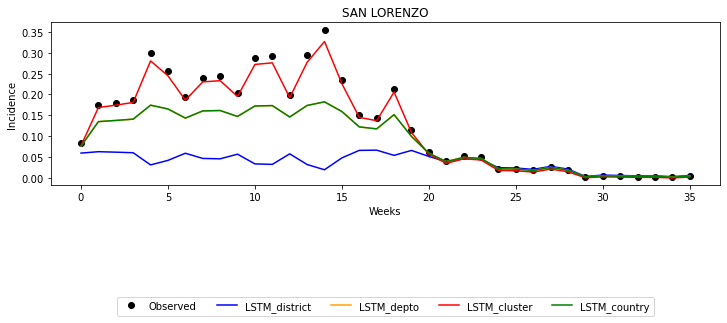

##########################################################################################
CAPIATA
CAPIATA
265
(265, 8)
212 38
2/2 [==============================] - 1s 4ms/step - loss: 0.0232
Test loss 1: 0.0340
Test loss 2: 0.0232
Test loss 3: 0.0169
Test loss 4: 0.0232
--------------------
Test Score 1 = RMSE: 0.1334 MASE: 0.8573
Test Score 2 = RMSE: 0.1102 MASE: 0.6699
Test Score 3 = RMSE: 0.0940 MASE: 0.6277
Test Score 4 = RMSE: 0.1102 MASE: 0.6699


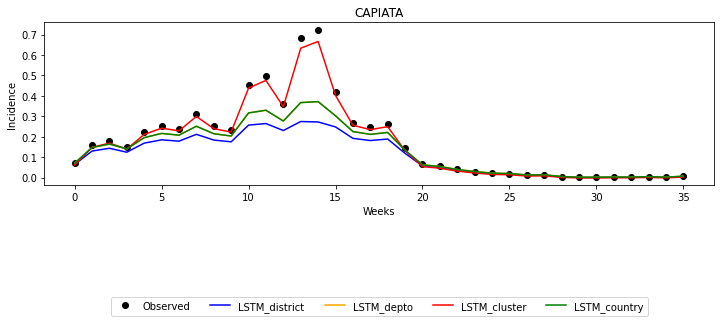

##########################################################################################
CAAGUAZU
CAAGUAZU
265
(265, 8)
212 38
2/2 [==============================] - 1s 4ms/step - loss: 0.0222
Test loss 1: 0.0577
Test loss 2: 0.0221
Test loss 3: 0.0150
Test loss 4: 0.0222
--------------------
Test Score 1 = RMSE: 0.0266 MASE: 1.3951
Test Score 2 = RMSE: 0.0165 MASE: 0.8528
Test Score 3 = RMSE: 0.0135 MASE: 0.7060
Test Score 4 = RMSE: 0.0165 MASE: 0.8286


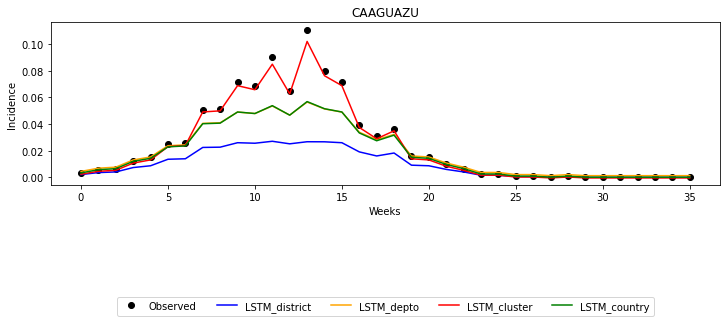

##########################################################################################
AREGUA
AREGUA
265
(265, 8)
212 38
2/2 [==============================] - 1s 4ms/step - loss: 0.0216
Test loss 1: 0.0262
Test loss 2: 0.0216
Test loss 3: 0.0183
Test loss 4: 0.0216
--------------------
Test Score 1 = RMSE: 0.1201 MASE: 0.7311
Test Score 2 = RMSE: 0.1091 MASE: 0.6490
Test Score 3 = RMSE: 0.1003 MASE: 0.6668
Test Score 4 = RMSE: 0.1091 MASE: 0.6490


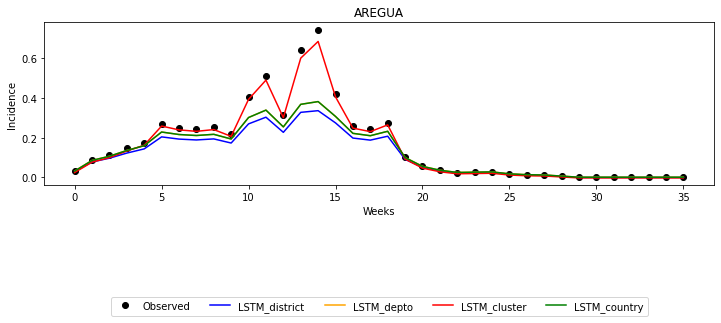

##########################################################################################
SALTO DEL GUAIRA
SALTO DEL GUAIRA
265
(265, 8)
212 38
2/2 [==============================] - 1s 5ms/step - loss: 0.0238
Test loss 1: 0.0386
Test loss 2: 0.0257
Test loss 3: 0.0199
Test loss 4: 0.0238
--------------------
Test Score 1 = RMSE: 0.0259 MASE: 0.9391
Test Score 2 = RMSE: 0.0211 MASE: 0.8991
Test Score 3 = RMSE: 0.0186 MASE: 0.7423
Test Score 4 = RMSE: 0.0203 MASE: 0.7503


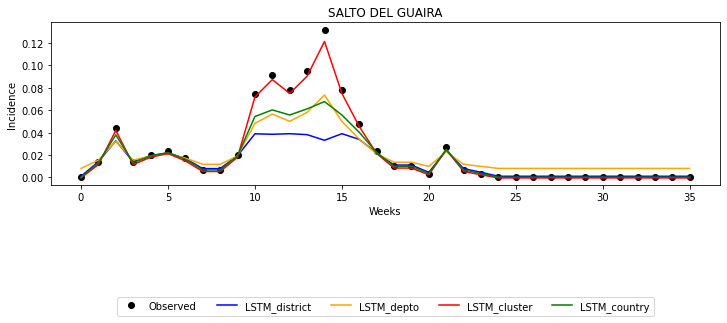

##########################################################################################
CHORE
CHORE
265
(265, 8)
212 38
2/2 [==============================] - 2s 6ms/step - loss: 0.0257
Test loss 1: 0.0240
Test loss 2: 0.0241
Test loss 3: 0.0339
Test loss 4: 0.0257
--------------------
Test Score 1 = RMSE: 0.0063 MASE: 0.8628
Test Score 2 = RMSE: 0.0063 MASE: 0.9242
Test Score 3 = RMSE: 0.0075 MASE: 0.9033
Test Score 4 = RMSE: 0.0065 MASE: 0.8476


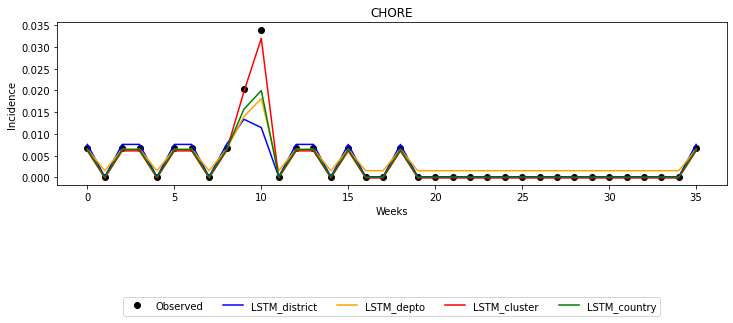

##########################################################################################
JUAN LEON MALLORQUIN
JUAN LEON MALLORQUIN
265
(265, 8)
212 38
2/2 [==============================] - 2s 5ms/step - loss: 0.0247
Test loss 1: 0.0299
Test loss 2: 0.0267
Test loss 3: 0.0297
Test loss 4: 0.0247
--------------------
Test Score 1 = RMSE: 0.0096 MASE: 0.5962
Test Score 2 = RMSE: 0.0091 MASE: 0.6148
Test Score 3 = RMSE: 0.0096 MASE: 0.6712
Test Score 4 = RMSE: 0.0088 MASE: 0.5882


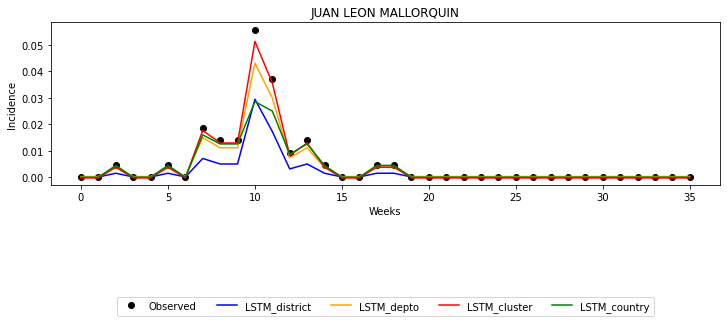

##########################################################################################
SANTA ROSA DEL AGUARAY
SANTA ROSA DEL AGUARAY
265
(265, 8)
212 38
2/2 [==============================] - 1s 4ms/step - loss: 0.0074
Test loss 1: 0.0189
Test loss 2: 0.0079
Test loss 3: 0.0119
Test loss 4: 0.0074
--------------------
Test Score 1 = RMSE: 0.0060 MASE: 1.0828
Test Score 2 = RMSE: 0.0039 MASE: 1.3076
Test Score 3 = RMSE: 0.0047 MASE: 1.0932
Test Score 4 = RMSE: 0.0037 MASE: 0.9579


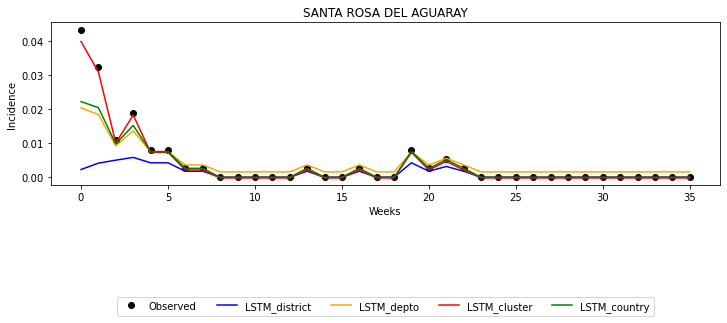

##########################################################################################
QUIINDY
QUIINDY
265
(265, 8)
212 38
2/2 [==============================] - 2s 4ms/step - loss: 0.0263
Test loss 1: 0.0279
Test loss 2: 0.0254
Test loss 3: 0.0305
Test loss 4: 0.0263
--------------------
Test Score 1 = RMSE: 0.0095 MASE: 0.9573
Test Score 2 = RMSE: 0.0091 MASE: 0.8954
Test Score 3 = RMSE: 0.0099 MASE: 0.9878
Test Score 4 = RMSE: 0.0092 MASE: 0.9022


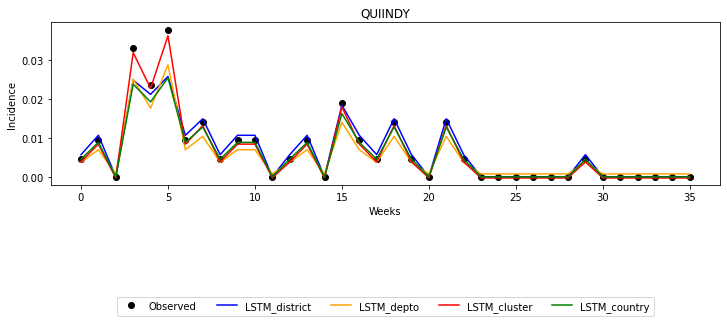

##########################################################################################
EUSEBIO AYALA
EUSEBIO AYALA
265
(265, 8)
212 38
2/2 [==============================] - 1s 6ms/step - loss: 0.0405
Test loss 1: 0.0446
Test loss 2: 0.0390
Test loss 3: 0.0565
Test loss 4: 0.0405
--------------------
Test Score 1 = RMSE: 0.0101 MASE: 0.7167
Test Score 2 = RMSE: 0.0095 MASE: 0.6934
Test Score 3 = RMSE: 0.0114 MASE: 0.8103
Test Score 4 = RMSE: 0.0097 MASE: 0.6622


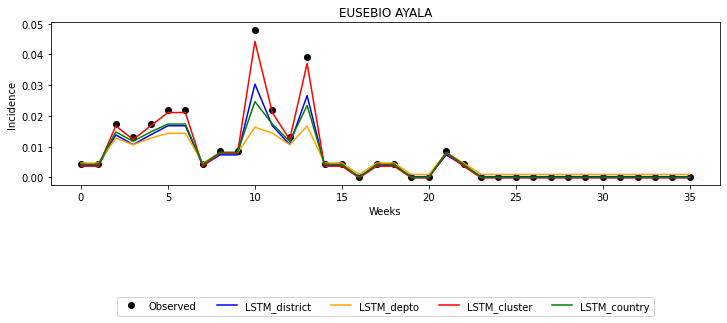

##########################################################################################
ENCARNACION
ENCARNACION
265
(265, 8)
212 38
2/2 [==============================] - 1s 4ms/step - loss: 0.0376
Test loss 1: 0.0429
Test loss 2: 0.0441
Test loss 3: 0.0449
Test loss 4: 0.0376
--------------------
Test Score 1 = RMSE: 0.0028 MASE: 0.6468
Test Score 2 = RMSE: 0.0028 MASE: 0.7738
Test Score 3 = RMSE: 0.0029 MASE: 0.7436
Test Score 4 = RMSE: 0.0026 MASE: 0.6383


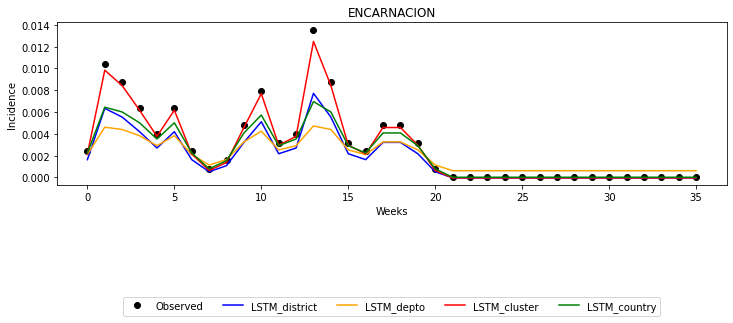

##########################################################################################
SAN PEDRO DEL YCUAMANDIYU
SAN PEDRO DEL YCUAMANDIYU
265
(265, 8)
212 38
2/2 [==============================] - 1s 6ms/step - loss: 0.0573
Test loss 1: 0.0825
Test loss 2: 0.0543
Test loss 3: 0.0727
Test loss 4: 0.0573
--------------------
Test Score 1 = RMSE: 0.0033 MASE: 0.6505
Test Score 2 = RMSE: 0.0027 MASE: 0.7232
Test Score 3 = RMSE: 0.0031 MASE: 0.7969
Test Score 4 = RMSE: 0.0028 MASE: 0.6802


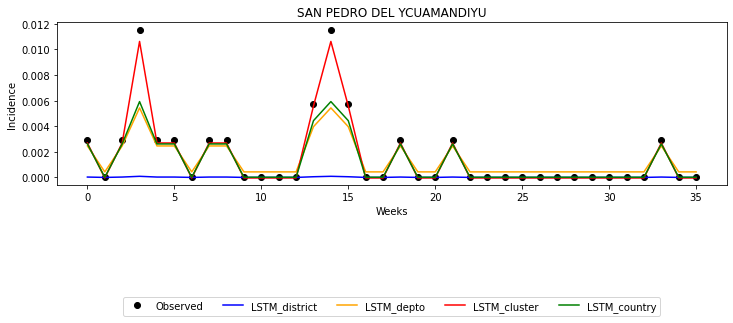

##########################################################################################
CAPITAN MIRANDA
CAPITAN MIRANDA
265
(265, 8)
212 38
2/2 [==============================] - 1s 4ms/step - loss: 0.0428
Test loss 1: 0.0379
Test loss 2: 0.0382
Test loss 3: 0.0529
Test loss 4: 0.0428
--------------------
Test Score 1 = RMSE: 0.0031 MASE: 0.5520
Test Score 2 = RMSE: 0.0031 MASE: 0.8384
Test Score 3 = RMSE: 0.0036 MASE: 0.7078
Test Score 4 = RMSE: 0.0033 MASE: 0.5481


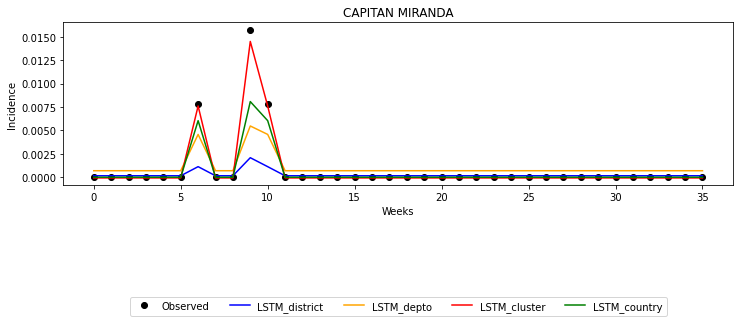

##########################################################################################
YHU
YHU
265
(265, 8)
212 38
2/2 [==============================] - 1s 4ms/step - loss: 0.0912
Test loss 1: 0.0770
Test loss 2: 0.0893
Test loss 3: 0.1192
Test loss 4: 0.0912
--------------------
Test Score 1 = RMSE: 0.0016 MASE: 0.8039
Test Score 2 = RMSE: 0.0017 MASE: 1.0475
Test Score 3 = RMSE: 0.0020 MASE: 1.1544
Test Score 4 = RMSE: 0.0017 MASE: 1.0269


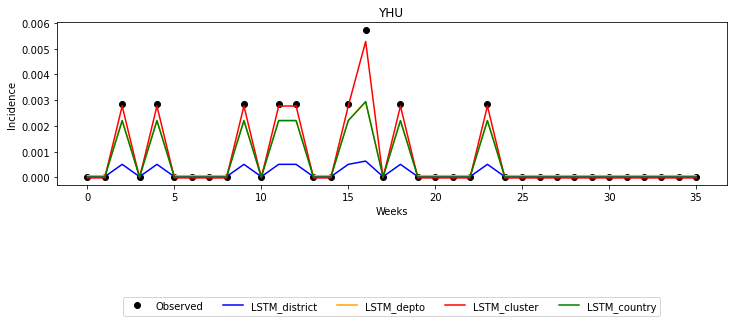

##########################################################################################
SANTA RITA
SANTA RITA
265
(265, 8)
212 38
2/2 [==============================] - 1s 4ms/step - loss: 0.0149
Test loss 1: 0.0100
Test loss 2: 0.0146
Test loss 3: 0.0173
Test loss 4: 0.0149
--------------------
Test Score 1 = RMSE: 0.0017 MASE: 0.8775
Test Score 2 = RMSE: 0.0021 MASE: 0.9490
Test Score 3 = RMSE: 0.0022 MASE: 0.9810
Test Score 4 = RMSE: 0.0021 MASE: 0.8956


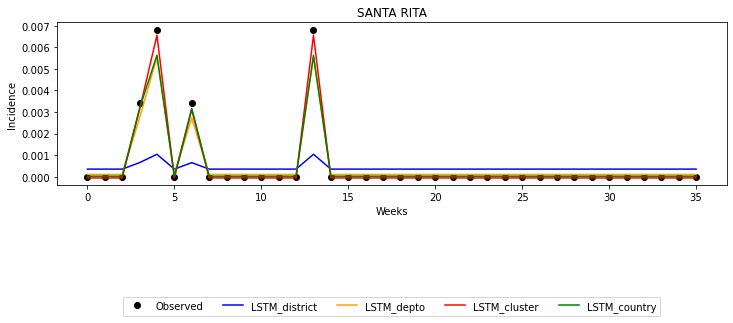

##########################################################################################


In [22]:
# load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model


listaDistritos=['SAN LORENZO','CAPIATA','CAAGUAZU','AREGUA','SALTO DEL GUAIRA','CHORE','JUAN LEON MALLORQUIN','SANTA ROSA DEL AGUARAY','QUIINDY','EUSEBIO AYALA','ENCARNACION','SAN PEDRO DEL YCUAMANDIYU','CAPITAN MIRANDA','YHU','SANTA RITA']
listaModelosDistritos=['SAN_LORENZO','CAPIATA','CAAGUAZU','AREGUA','SALTO_DEL_GUAIRA','CHORE','JUAN_LEON_MALLORQUIN','SANTA_ROSA_DEL_AGUARAY','QUIINDY','EUSEBIO_AYALA','ENCARNACION','SAN_PEDRO_DEL_YCUAMANDIYU','CAPITAN_MIRANDA','YHU','SANTA_RITA']
listaDeptos=['CENTRAL','CENTRAL','CAAGUAZU','CENTRAL','CANINDEYU','SAN_PEDRO','ALTO_PARANA','SAN_PEDRO','PARAGUARI','CORDILLERA','ITAPUA','SAN_PEDRO','ITAPUA','CAAGUAZU','ALTO_PARANA']
ListaCluster=[3,3,3,3,3,3,3,8,3,3,3,4,2,1,5]

Distrito=[]
t1_R=[]
t1_S=[]
t2_R=[]
t2_S=[]
t3_R=[]
t3_S=[]
t4_R=[]
t4_S=[]


for i in range(len(listaModelosDistritos)):
    # load model
    model1 = load_model('./data/Resultados/Distritos/model2_'+str(listaModelosDistritos[i])+'.h5')
    model2 = load_model('./data/Resultados/Deptos/model_'+str(listaDeptos[i])+'.h5')
    #model3 = load_model('./data/Resultados/Clusters/modelC_'+str(listaCluster[i])+'.h5')
    model4 = load_model('./data/Resultados/Clusters/model_CENTRAL.h5')
    #model4 = load_model('./data/Resultados/Deptos/model_CENTRAL.h5')
    model3 = load_model('./data/Resultados/Clusters/modelC_5.h5')
    # summarize model.
    #model.summary()
    # load dataset
    depto=listaDistritos[i]
    print(listaDistritos[i])
    print(str(listaDistritos[i]))
    departamento=dataset1['distrito_nombre']==depto
    notif_x_depto=dataset1[departamento]
    #notif_x_depto = notif_x_depto.reset_index(drop=True)
    print(len(notif_x_depto))
    print(notif_x_depto.shape)
    dataframe=notif_x_depto[['incidencia']]
    dataset = dataframe.values
    dataset = dataset.astype('float32')
    # normalize the dataset
    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(dataset)
    # slit into train and test sets
    train_size = int(len(dataset) * 0.80)
    test_size = len(dataset) - train_size
    train, test = dataset[0:train_size,:], dataset[train_size:len(dataset)-15,:]
    print(len(train), len(test))
    # reshape into X=t and Y=t+1
    look_back = 1
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)
    # reshape input to be [samples, time steps, features]
    trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    
    #trainX_, trainY_ = create_dataset(train, 8)
    #testX_, testY_ = create_dataset(test, 8)
    # reshape input to be [samples, time steps, features]
    #trainX_ = np.reshape(trainX_, (trainX_.shape[0], 1, trainX_.shape[1]))
    #testX_ = np.reshape(testX_, (testX_.shape[0], 1, testX_.shape[1]))


    # evaluate the model
    score1 = model1.evaluate(testX, testY, verbose=0)
    test_mse1 = model1.evaluate(testX, testY, verbose=1)
    test_mse2 = model2.evaluate(testX, testY, verbose=1)
    test_mse3 = model3.evaluate(testX, testY, verbose=1)
    test_mse4 = model4.evaluate(testX, testY, verbose=1)
    print('Test loss 1: %.4f' % (test_mse1))
    print('Test loss 2: %.4f' % (test_mse2))
    print('Test loss 3: %.4f' % (test_mse3))
    print('Test loss 4: %.4f' % (test_mse4))
    print('--------------------')


    # make predictions
    trainPredict1 = model1.predict(trainX)
    testPredict1 = model1.predict(testX)
    trainPredict2 = model2.predict(trainX)
    testPredict2 = model2.predict(testX)
    trainPredict3 = model3.predict(trainX)
    testPredict3 = model3.predict(testX)
    trainPredict4 = model4.predict(trainX)
    testPredict4 = model4.predict(testX)
    # invert predictions
    #trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])
    testPredict1 = scaler.inverse_transform(testPredict1)
    testPredict2 = scaler.inverse_transform(testPredict2)
    testPredict3 = scaler.inverse_transform(testPredict3)
    testPredict4 = scaler.inverse_transform(testPredict4)
    testY = scaler.inverse_transform([testY])
    # calculate root mean squared error
    #trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
    #print('Train Score: %.2f RMSE' % (trainScore))
    testScore1 = math.sqrt(mean_squared_error(testY[0], testPredict1[:,0]))
    testScore2 = math.sqrt(mean_squared_error(testY[0], testPredict2[:,0]))
    testScore3 = math.sqrt(mean_squared_error(testY[0], testPredict3[:,0]))
    testScore4 = math.sqrt(mean_squared_error(testY[0], testPredict4[:,0]))
    stestScore1 = mase(testY[0],testPredict1[:,0])
    stestScore2 = mase(testY[0],testPredict2[:,0])
    stestScore3 = mase(testY[0],testPredict3[:,0])
    stestScore4 = mase(testY[0],testPredict4[:,0])
    print('Test Score 1 = RMSE: %.4f' % (testScore1),'MASE: %.4f' % (stestScore1) )
    print('Test Score 2 = RMSE: %.4f' % (testScore2),'MASE: %.4f' % (stestScore2))
    print('Test Score 3 = RMSE: %.4f' % (testScore3),'MASE: %.4f' % (stestScore3))
    print('Test Score 4 = RMSE: %.4f' % (testScore4),'MASE: %.4f' % (stestScore4))
    # shift train predictions for plotting
    #trainPredictPlot = np.empty_like(dataset)
    #rainPredictPlot[:, :] = np.nan
    #trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
    # shift test predictions for plotting
    testPredictPlot1 = np.empty_like(dataset[0:len(dataset)-15,:])
    testPredictPlot2 = np.empty_like(dataset[0:len(dataset)-15,:])
    testPredictPlot3 = np.empty_like(dataset[0:len(dataset)-15,:])
    testPredictPlot4 = np.empty_like(dataset[0:len(dataset)-17,:])
    testPredictPlot1[:, :] = np.nan
    testPredictPlot2[:, :] = np.nan
    testPredictPlot3[:, :] = np.nan
    testPredictPlot4[:, :] = np.nan
    testPredictPlot1 = testPredict1
    testPredictPlot2 = testPredict2
    testPredictPlot3 = testPredict3
    testPredictPlot4 = testPredict4      
    #Para generar el dataframe
    reg=len(dataframe.index)
    # plot baseline and predictions
    plt.figure(figsize=(12,3))
    plt.xlabel('Weeks')
    plt.ylabel('Incidence')
    plt.plot(scaler.inverse_transform(dataset[train_size:len(dataset)-17,:]),'o',c='black', label="Observed")

    #train=plt.plot(trainPredictPlot, label="Train")
    predict1=plt.plot(testPredictPlot1, label="LSTM_district", color="blue")
    predict2=plt.plot(testPredictPlot2, label="LSTM_depto", color="orange")
    predict3=plt.plot(testPredictPlot3, label="LSTM_cluster", color="red")
    predict4=plt.plot(testPredictPlot4, label="LSTM_country", color="green")
    
    
    #predict3=plt.plot(testPredictPlot3, label="LSTM_cluster", color="red")
    #predict4=plt.plot(testPredictPlot4, label="LSTM_cluster_GA", color="green")
    
    
    
    plt.title(depto)
    plt.legend(bbox_to_anchor=(0.5, -0.8), loc=8, borderaxespad=0. ,ncol=5)
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


    plt.show()
    #Para mi tabla
    Distrito.append(listaDistritos[i])
    t1_R.append(testScore1)
    t1_S.append(stestScore1)
    t2_R.append(testScore2)
    t2_S.append(stestScore2)
    t3_R.append(testScore3)
    t3_S.append(stestScore3)
    t4_R.append(testScore4)
    t4_S.append(stestScore4)
    
    
    print("##########################################################################################")
#La tabla    
data_tuples = list(zip(Distrito,t1_R,t1_S,t2_R,t2_S,t3_R,t3_S,t4_R,t4_S))
Tabla = pd.DataFrame(data_tuples, columns =['Distrito','RMSE','SMAPE','RMSE','SMAPE','RMSE','SMAPE','RMSE','SMAPE']) 
Tabla.to_csv("./data/Resultados/Resultados_Comparativa.csv")

In [23]:
Tabla

,Distrito,RMSE,SMAPE,RMSE,SMAPE,RMSE,SMAPE,RMSE,SMAPE
0,SAN LORENZO,0.136012,2.025340,0.068872,0.974949,0.051032,0.750447,0.068872,0.974949
1,CAPIATA,0.133419,0.857285,0.110227,0.669854,0.093990,0.627685,0.110227,0.669854
2,CAAGUAZU,0.026579,1.395126,0.016464,0.852787,0.013544,0.706030,0.016486,0.828609
3,AREGUA,0.120125,0.731122,0.109065,0.648970,0.100285,0.666755,0.109065,0.648970
4,SALTO DEL GUAIRA,0.025891,0.939104,0.021147,0.899079,0.018598,0.742343,0.020311,0.750299
5,CHORE,0.006315,0.862792,0.006339,0.924175,0.007509,0.903331,0.006535,0.847595
6,JUAN LEON MALLORQUIN,0.009636,0.596191,0.009108,0.614834,0.009595,0.671168,0.008754,0.588215
7,SANTA ROSA DEL AGUARAY,0.005962,1.082781,0.003862,1.307649,0.004721,1.093218,0.003734,0.957899
8,QUIINDY,0.009489,0.957258,0.009059,0.895363,0.009931,0.987801,0.009210,0.902241
9,EUSEBIO AYALA,0.010145,0.716741,0.009495,0.693355,0.011420,0.810330,0.009677,0.662168


In [24]:
listaDistritos=['SAN_LORENZO','CAPIATA','CAAGUAZU','AREGUA','SALTO_DEL_GUAIRA','CHORE','JUAN_LEON_MALLORQUIN','SANTA_ROSA_DEL_AGUARAY','QUIINDY','EUSEBIO_AYALA','ENCARNACION','SAN_PEDRO_DEL_YCUAMANDIYU','CAPITAN_MIRANDA','YHU','SANTA_RITA']
listaEspecial=['SAN LORENZO','CAPIATA','CAAGUAZU','AREGUA','SALTO DEL GUAIRA','CHORE','JUAN LEON MALLORQUIN','SANTA ROSA DEL AGUARAY','QUIINDY','EUSEBIO AYALA','ENCARNACION','SAN PEDRO DEL YCUAMANDIYU','CAPITAN MIRANDA','YHU','SANTA RITA']

Distrito=[]
t_R=[]
t_S=[]
tl=[]

for i in range(len(listaDistritos)):
    model = load_model('./data/Resultados/Clusters/modelC_5.h5')
    depto=listaEspecial[i]
    print(listaDistritos[i])
    print(str(listaDistritos[i]))
    departamento=dataset1['distrito_nombre']==depto
    notif_x_depto=dataset1[departamento]
    #notif_x_depto = notif_x_depto.reset_index(drop=True)
    print(len(notif_x_depto))
    print(notif_x_depto.shape)
    #dataframe=notif_x_depto[['incidencia']]
    dataframe=notif_x_depto[['incidencia']]
    dataset = dataframe.values
    dataset = dataset.astype('float32')
    # normalize the dataset
    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(dataset)
    #Validaciones
    tscv = TimeSeriesSplit(n_splits = 8)
    for train_index, test_index in tscv.split(dataset):
        print("TRAIN:", train_index.shape, "TEST:", test_index.shape)
        train_len=len(train_index)
        train = dataset[train_index]
        test = dataset[test_index]
        print(len(train), len(test))
        # reshape into X=t and Y=t+1
        look_back = 1
        trainX, trainY = create_dataset(train, look_back)
        testX, testY = create_dataset(test, look_back)
        # reshape input to be [samples, time steps, features]
        trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
        testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
        trainPredict = model.predict(trainX)
        testPredict = model.predict(testX)
        
        trainY = scaler.inverse_transform([trainY])
        testPredict = scaler.inverse_transform(testPredict) 
        testY = scaler.inverse_transform([testY])
        # calculate root mean squared error
        #trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
        #print('Train Score: %.2f RMSE' % (trainScore))
        testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
        stestScore = smape(testY[0],testPredict[:,0])
   
        print('Test Score 1 = RMSE: %.4f' % (testScore),'smape: %.4f' % (stestScore) )

       
        Distrito.append(listaDistritos[i])
        t_R.append(testScore)
        t_S.append(stestScore)
        tl.append(train_len)

    
    
    print("##########################################################################################")
    #La tabla    
data_tuples = list(zip(Distrito,t_R,t_S,tl))
TablaNV = pd.DataFrame(data_tuples, columns =['Distrito','RMSE','SMAPE','Train_lenght']) 
TablaNV.to_csv("./data/Resultados/Tabla_Nested.csv")

SAN_LORENZO
SAN_LORENZO
265
(265, 8)


NameError: name 'TimeSeriesSplit' is not defined

In [ ]:
listaDistritos=['SAN_LORENZO','CAPIATA','CAAGUAZU','AREGUA','SALTO_DEL_GUAIRA','CHORE','JUAN_LEON_MALLORQUIN','SANTA_ROSA_DEL_AGUARAY','QUIINDY','EUSEBIO_AYALA','ENCARNACION','SAN_PEDRO_DEL_YCUAMANDIYU','CAPITAN_MIRANDA','YHU','SANTA_RITA']
listaEspecial=['SAN LORENZO','CAPIATA','CAAGUAZU','AREGUA','SALTO DEL GUAIRA','CHORE','JUAN LEON MALLORQUIN','SANTA ROSA DEL AGUARAY','QUIINDY','EUSEBIO AYALA','ENCARNACION','SAN PEDRO DEL YCUAMANDIYU','CAPITAN MIRANDA','YHU','SANTA RITA']

Distrito=[]
RMSEmean=[]
STD=[]
for i in range(len(listaEspecial)):
    depto=listaDistritos[i]
    departamento=TablaNV['Distrito']==depto
    error=TablaNV[departamento]
    print("error shape",error.shape)
    #error = error.reset_index(drop=True)
    rmse=error['RMSE']
    
    smape_g=error['SMAPE']
    partitions=error['Train_lenght']
    #plt.figure(figsize=(10,3));
    #print(rmse.shape,smape_g.shape,partitions.shape)
    rr=rmse.mean(axis=0)
    st=rmse.std(axis=0)
    Distrito.append(listaDistritos[i])
    RMSEmean.append(rr)
    STD.append(st)
data_tuples = list(zip(Distrito,RMSEmean,STD,t4_R))
Tabla_NESTEDERRORS = pd.DataFrame(data_tuples, columns =['Distrito','RMSE','STD','Real']) 
Tabla_NESTEDERRORS
    
    

In [ ]:
def createKFoldsTS(data,n_splits,iterations,i):
    start = i * k_fold_size
    stop = start + k_fold_size
    mid = int(0.8 * (stop - start)) + start
    margin=0
    return data[start: mid], data[mid + margin: stop] 

In [ ]:
listaDistritos=['SAN_LORENZO','CAPIATA','CAAGUAZU','AREGUA','SALTO_DEL_GUAIRA','CHORE','JUAN_LEON_MALLORQUIN','SANTA_ROSA_DEL_AGUARAY','QUIINDY','EUSEBIO_AYALA','ENCARNACION','SAN_PEDRO_DEL_YCUAMANDIYU','CAPITAN_MIRANDA','YHU','SANTA_RITA']
listaEspecial=['SAN LORENZO','CAPIATA','CAAGUAZU','AREGUA','SALTO DEL GUAIRA','CHORE','JUAN LEON MALLORQUIN','SANTA ROSA DEL AGUARAY','QUIINDY','EUSEBIO AYALA','ENCARNACION','SAN PEDRO DEL YCUAMANDIYU','CAPITAN MIRANDA','YHU','SANTA RITA']

Distrito=[]
t_R=[]
t_S=[]

for i in range(len(listaDistritos)):
    model = load_model('./data/Resultados/Clusters/modelC_5.h5')
    depto=listaEspecial[i]
    print(listaDistritos[i])
    print(str(listaDistritos[i]))
    departamento=dataset1['distrito_nombre']==depto
    notif_x_depto=dataset1[departamento]
    #notif_x_depto = notif_x_depto.reset_index(drop=True)
    print(len(notif_x_depto))
    print(notif_x_depto.shape)
    #dataframe=notif_x_depto[['incidencia']]
    dataframe=notif_x_depto[['incidencia']]
    dataset = dataframe.values
    dataset = dataset.astype('float32')
    # normalize the dataset
    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(dataset)
    #Validaciones
    n_splits = 3
    n_samples = len(dataset)
    k_fold_size = n_samples // n_splits
    for x in range(n_splits):
        train_index,test_index=createKFoldsTS(dataset,k_fold_size,n_splits,x) #i stands for iterations number
        print("TRAIN:", train_index.shape, "TEST:", test_index.shape)
        train_len=len(train_index)
        train = train_index
        test = test_index
        print(len(train), len(test))
        # reshape into X=t and Y=t+1
        look_back = 1
        trainX, trainY = create_dataset(train, look_back)
        testX, testY = create_dataset(test, look_back)
        # reshape input to be [samples, time steps, features]
        trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
        testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
        trainPredict = model.predict(trainX)
        testPredict = model.predict(testX)
        
        trainY = scaler.inverse_transform([trainY])
        testPredict = scaler.inverse_transform(testPredict) 
        testY = scaler.inverse_transform([testY])
        # calculate root mean squared error
        #trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
        #print('Train Score: %.2f RMSE' % (trainScore))
        testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
        stestScore = smape(testY[0],testPredict[:,0])
        #smape=0
   
        print('Test Score 1 = RMSE: %.4f' % (testScore),'smape: %.4f' % (stestScore) )

       
        Distrito.append(listaDistritos[i])
        t_R.append(testScore)
        t_S.append(stestScore)
        tl.append(train_len)

    
    
    print("##########################################################################################")
    #La tabla    
data_tuples = list(zip(Distrito,t_R,t_S,tl))
TablaKV = pd.DataFrame(data_tuples, columns =['Distrito','RMSE','SMAPE','Train_lenght']) 
TablaKV.to_csv("./data/Resultados/Tabla_Kfold.csv")
        
      

In [ ]:
Distrito=[]
RMSEmean=[]
STD=[]
for i in range(len(listaEspecial)):
    depto=listaDistritos[i]
    departamento=TablaKV['Distrito']==depto
    error=TablaKV[departamento]
    print("error shape",error.shape)
    #error = error.reset_index(drop=True)
    rmse=error['RMSE']
    indices=[1,2,3,4,5]
    
    smape_g=error['SMAPE']
    partitions=error['Train_lenght']
    #plt.figure(figsize=(10,3));
    smape_g=error['SMAPE']
    partitions=error['Train_lenght']
    #plt.figure(figsize=(10,3));
    #print(rmse.shape,smape_g.shape,partitions.shape)
    rr=rmse.mean(axis=0)
    st=rmse.std(axis=0)
    Distrito.append(listaDistritos[i])
    RMSEmean.append(rr)
    STD.append(st)
data_tuples = list(zip(Distrito,RMSEmean,STD,t4_R))
Tabla_KFOLDERRORS = pd.DataFrame(data_tuples, columns =['Distrito','RMSE','STD','Real']) 
Tabla_KFOLDERRORS
    
    
    
    